Notebook to look at how resource costs evolve with reco time

1.0 {'cost': 141.21085253137625}
0.9 {'cost': 135.05592287806545}
0.8 {'cost': 128.90099322475464}
0.7 {'cost': 122.74606357144387}
0.6 {'cost': 116.5911339181331}
0.5 {'cost': 110.43620426482232}
0.4 {'cost': 104.28127461151155}
0.3 {'cost': 98.126344958200761}
0.2 {'cost': 91.971415304889987}
0.1 {'cost': 85.816485651579228}
1.0 0.00
0.9 0.04
0.8 0.09
0.7 0.13
0.6 0.17
0.5 0.22
0.4 0.26
0.3 0.31
0.2 0.35
0.1 0.39


(0.0, 150.0)

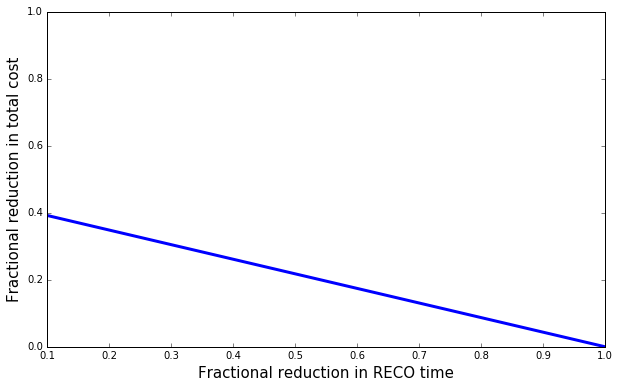

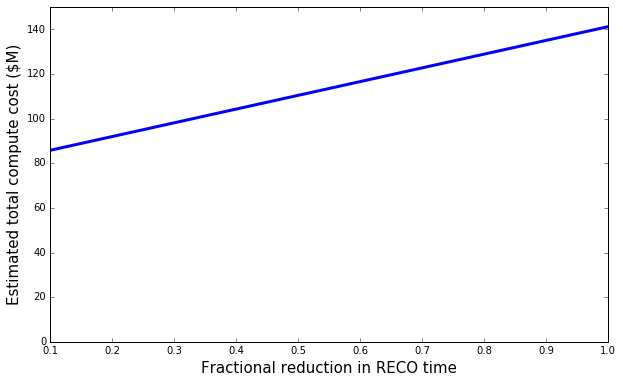

In [5]:
%run notebook_importer.ipynb
%matplotlib inline
import pylab
pylab.rcParams['figure.figsize'] = 10, 6

from resource_runner import run_computing_model
import resource_cpu
import CostEvolution

jsons=['json/RelyOnMiniAOD.json', 'json/Analysis.json', 'json/2018changes.json', 'json/IntroduceNanoAOD.json'] 
model=resource_cpu.create_model(jsons )
model['names']=jsons
cost_models=CostEvolution.define_cost_model()
model['cost_model']=cost_models

default_reco_hs06 = model['cpu_time']['data']['RECO']["2026"]
default_reco_hs06_mc = model['cpu_time']['mc']['RECO']["2026"]
#print default_reco_hs06,default_reco_hs06_mc
import numpy
vals = numpy.arange(1.0,0.0,-0.1)
costs=numpy.zeros(vals.shape[0])
for i,v in enumerate(vals):
    model['cpu_time']['data']['RECO']["2026"] = default_reco_hs06 * v
    model['cpu_time']['mc']['RECO']["2026"] = default_reco_hs06_mc * v
    metrics,details=run_computing_model(model)
    print v,metrics
    costs[i]=metrics['cost']
    
costFractions=1.0-costs/costs[0]
for i in range(len(vals)):
    print '%3.1f %4.2f' %(vals[i],costFractions[i])
    
import pylab
pylab.figure(10)
pylab.plot(vals,costFractions,linewidth=3)
pylab.xlabel('RECO time reduction factor',fontsize=15)
pylab.ylabel('Fractional reduction in total cost',fontsize=15)
pylab.ylim(ymin=0., ymax=1.)

pylab.figure(11)
pylab.plot(vals,costs,linewidth=3)
pylab.xlabel('RECO time reduction factor',fontsize=15)
pylab.ylabel('Estimated total compute cost ($M)',fontsize=15)
pylab.ylim(ymin=0., ymax=150.)



    